In [20]:
# !pip install quandl
import quandl
import pandas as pd

In [11]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'

# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')

# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


In [7]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}
# Create a year column 
tesla['Year'] = tesla.index.year
# Take Dates from index and move to Date column 
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0
# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.ix[i, 'cap'] = shares * tesla.ix[i, 'Adj. Close']

/Users/shisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [13]:
gm['Year'] = gm.index.year

# Take Dates from index and move to Date column 
gm.reset_index(level=0, inplace = True)
gm['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.ix[i, 'cap'] = shares * gm.ix[i, 'Adj. Close']

/Users/shisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [16]:
# Merge the two datasets and rename the columns
cars = gm.merge(tesla, how='inner', on='Date')
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)


# Select only the relevant columns
cars = cars.ix[:, ['Date', 'gm_cap', 'tesla_cap']]

# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

cars.head()

/Users/shisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


In [207]:
cars.to_csv("cars_with_segments.csv", index=False)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
def smoothing_with_trend(series, model: str = ['additive', 'multiplicative'], ) -> pd.Series:
    ts_decomposed = seasonal_decompose(series, model=model)
    smoothed_series = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    # print(ts_decomposed.trend)
    # print(ts_decomposed.seasonal)
    # print(ts_decomposed.resid)
    # print(ts_decomposed.observed)
    # make sure the return value is also a pd.Series, if not convert
    return smoothed_series

In [37]:
cars.set_index(cars['Date'], inplace=True)

In [42]:
cars['gm_cap'].index

DatetimeIndex(['2010-11-18', '2010-11-19', '2010-11-22', '2010-11-23',
               '2010-11-24', '2010-11-26', '2010-11-29', '2010-11-30',
               '2010-12-01', '2010-12-02',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1849, freq=None)

In [65]:
ts_decomposed = seasonal_decompose(cars["gm_cap"], model='additive', freq=350)

In [114]:
type(trend)

pandas.core.series.Series

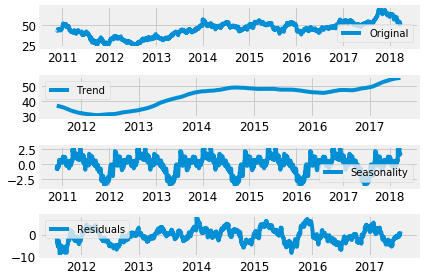

In [66]:
trend = ts_decomposed.trend
seasonal = ts_decomposed.seasonal
residual = ts_decomposed.resid

plt.subplot(411)
plt.plot(cars["gm_cap"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [92]:
from anomaly_detection import detect_anomalies

In [100]:
print(gm.index.dtype)
print(cars.index.is_all_dates, cars.index.dtype_str)

int64
True datetime64[ns]


In [101]:
def helper_series_to_data(ts):
    # not generic enough to get a mapping btw pos to original index
    return dict(zip(range(len(ts.index)), ts.values))

In [105]:
anomalies = detect_anomalies(helper_series_to_data(cars['gm_cap']), 5)

In [111]:
for anomoly in anomalies:
    print((anomoly.exact_timestamp, anomoly.anomaly_score), anomoly.get_time_window())

(48, 5.243320383549047) (48, 48)
(240, 6.485557251059825) (240, 240)
(246, 6.6139777897390974) (246, 246)
(304, 5.594913082540212) (304, 304)
(313, 6.48304555591363) (313, 313)
(490, 6.389907923267885) (490, 490)
(532, 8.78201059551694) (532, 532)
(784, 18.349096304721343) (784, 784)
(830, 5.313073623374671) (830, 830)
(976, 5.534271337733361) (976, 976)
(1238, 6.2612164298801956) (1238, 1238)
(1288, 5.438984863379205) (1288, 1288)
(1519, 5.868325743561038) (1519, 1519)
(1541, 5.81933118215353) (1541, 1541)
(1728, 5.73826153889807) (1728, 1728)
(1814, 5.629593260977461) (1814, 1814)


In [108]:
latest_anomaly_bkp_loc_coarse = anomalies[-1].exact_timestamp
print(latest_anomaly_bkp_loc_coarse)

1814


In [88]:
from luminol.correlator import Correlator

ts1 = {0: 0, 1: 0.5, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0}
ts2 = {0: 0, 1: 0.5, 2: 1, 3: 0.5, 4: 1, 5: 0, 6: 1, 7: 1, 8: 1}

my_detector = AnomalyDetector(ts1, score_threshold=1.5)
score = my_detector.get_all_scores()
anomalies = my_detector.get_anomalies()
for a in anomalies:
    time_period = a.get_time_window()
    my_correlator = Correlator(ts1, ts2, time_period)
    if my_correlator.is_correlated(threshold=0.8):
        print("ts2 correlate with ts1 at time period (%d, %d)" % time_period)

ts2 correlate with ts1 at time period (2, 5)


In [129]:
from matplotlib.dates import DateFormatter, datestr2num
from datetime import datetime
import numpy as np

In [180]:
def express_date(dt, fmt, tz=None):
    if isinstance(dt, datetime):
        pass
    elif isinstance(dt, np.datetime64):
        dt = pd.to_datetime(dt)
    elif isinstance(dt, "str"):
        dt = datestr2num(dt)
    else:
        raise ValueError("pls provide a date")
    
    fmt = re.sub(r"%Q", get_quarter(dt), fmt)
    fmt = re.sub(r"%q", get_quarter(dt).lower(), fmt)
    return DateFormatter(fmt=fmt, tz=tz).strftime(dt = dt)
    
    
test_dt = cars.index.values[0]
print(test_dt, express_date(pd.to_datetime(test_dt), "%Y-%Q"))

2010-11-18T00:00:00.000000000 2010-Q4


In [165]:
import re
import math
def get_quarter(d):
    return "Q%d" % math.ceil(d.month/3)

In [184]:
# !pip install ruptures
import ruptures as rpt

In [206]:
# signal

b [128, 251, 374, 500]
my_bkps: [5, 10, 15, 25, 85, 125, 130, 140, 160, 200, 205, 230, 235, 250, 375, 380, 385, 390, 400, 425, 440, 465, 470, 495, 500]


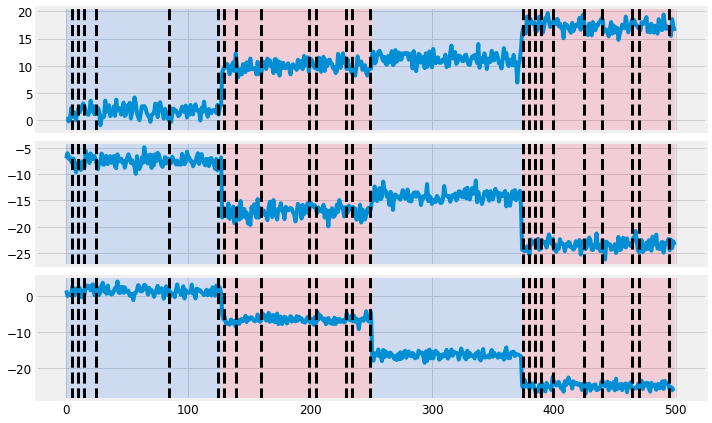

In [198]:
# creation of data
n, dim = 500, 3
n_bkps, sigma = 3, 1
signal, b = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
print("b", b)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(pen=3)
print("my_bkps:", my_bkps)

# show results
fig, ax = rpt.display(signal, b, my_bkps, figsize=(10, 6))
plt.show()

b [128, 251, 374, 500]
my_bkps: [130, 250, 375, 500]


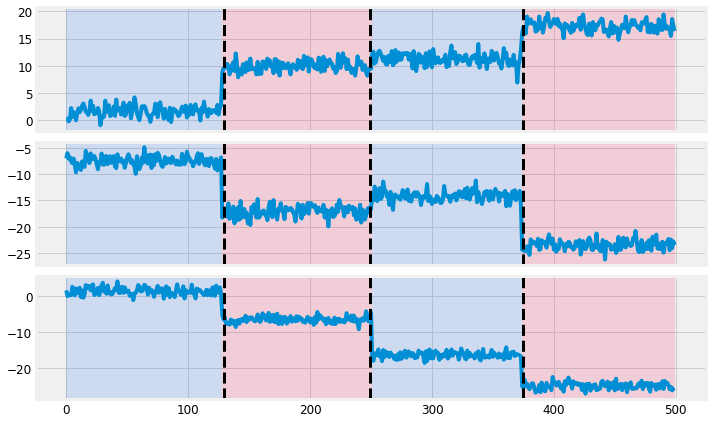

In [201]:
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)
# my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
print("b", b)
print("my_bkps:", my_bkps)
# show results
rpt.show.display(signal, b, my_bkps, figsize=(10, 6))
plt.show()

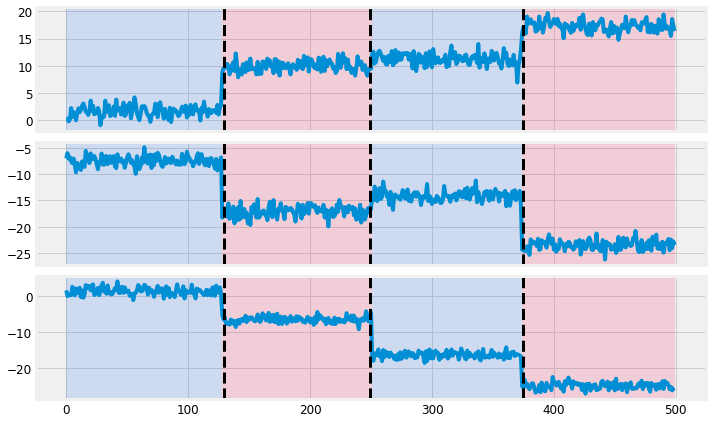

In [202]:
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, b, my_bkps, figsize=(10, 6))
plt.show()

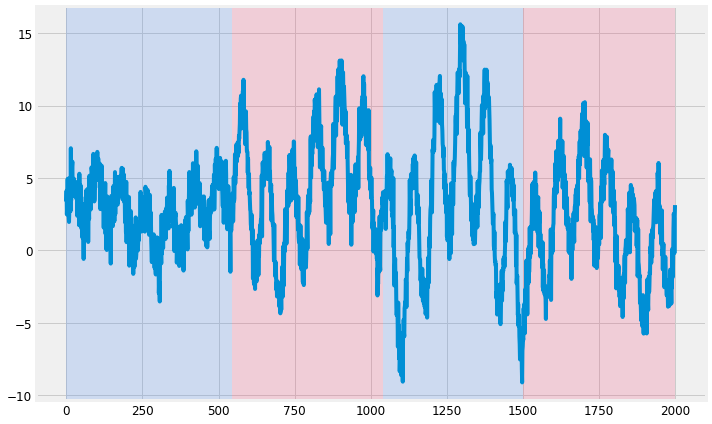

In [197]:
n, n_reg = 2000, 3  # number of samples, number of regressors (including intercept)
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
# regressors
tt = np.linspace(0, 10*np.pi, n)
X = np.vstack((np.sin(tt), np.sin(5*tt), np.ones(n))).T
# parameter vectors
deltas, bkps = rpt.pw_constant(n, n_reg, n_bkps, noise_std=None, delta=(1, 3))
# observed signal
y = np.sum(X*deltas, axis=1)
y += np.random.normal(size=y.shape)
# display signal
rpt.show.display(y, bkps, figsize=(10, 6))
plt.show()

In [208]:
(1849-1830)/1849

0.010275824770146024